In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)


df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["target"] = housing.target

df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df = df.reset_index(drop=True)
X = df[housing.feature_names]
targets = df["target"]
# Always use transform_data function on X
scaler = StandardScaler().fit(np.array(targets).reshape(-1, 1))
targets = scaler.transform(np.array(targets).reshape(-1, 1)).flatten()

df["target"] = targets
data=df

In [3]:
import sys
sys.path.append('..')

In [4]:
from xDL.models.NAM import NAM

In [5]:

nam = NAM(
    "target ~  -1  + MLP(MedInc) + MLP(AveRooms; encoding=one_hot; n_bins=10; hidden_dims=[12, 12, 12]) + MLP(AveOccup) + MLP(AveBedrms) + MLP(Population) + MLP(Latitude):MLP(Longitude)", 
    data=data, 
    feature_dropout=0.0001
    )

--- Preprocessing ---


8it [00:03,  2.08it/s]
7it [00:00, 4092.00it/s]


------------- Network architecture --------------
MedInc -> MLP(feature=MedInc, n_params=12736 -> output dimension=1)
AveRooms -> MLP(feature=AveRooms, n_params=456 -> output dimension=1)
AveOccup -> MLP(feature=AveOccup, n_params=12736 -> output dimension=1)
AveBedrms -> MLP(feature=AveBedrms, n_params=12736 -> output dimension=1)
Population -> MLP(feature=Population, n_params=12736 -> output dimension=1)
Latitude_._Longitude -> MLP(feature=Latitude_._Longitude, n_params=12864 -> output dimension=1)


In [6]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics="mse")

# Train the model
nam.fit(nam.training_dataset, epochs=1, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

4/4 [==============================] - 0s 17ms/step - loss: 0.4656 - mse: 0.4656
Test Loss: [0.46558770537376404, 0.46558770537376404]


In [ ]:
significances = nam.get_significance()

In [ ]:
significances

,feature,t-stat,p_value
0,MedInc,[-2.9259],[0.0044]
1,AveRooms,[-3.716],[0.0004]
2,AveOccup,[9.9945],[0.0002]
3,AveBedrms,[0.3217],[0.7323]
4,Population,[1.5343],[0.1236]
5,Latitude<>Longitude,[-5.562],[0.0002]


16/16 [==============================] - 0s 4ms/step


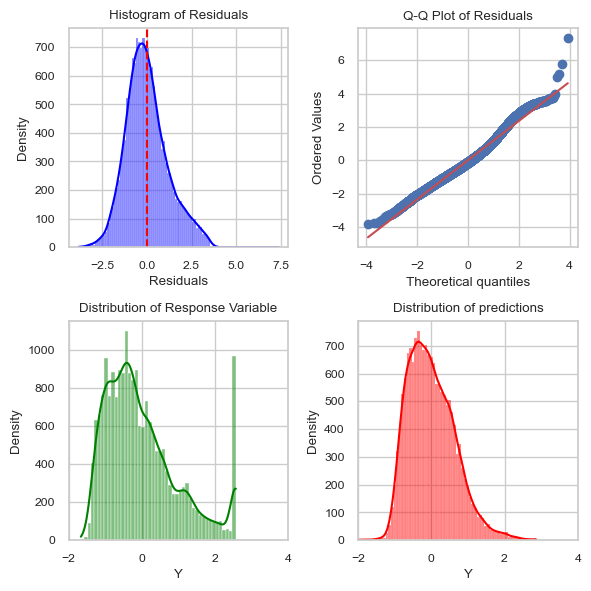

In [ ]:
nam.analytics_plot()

100/100 [==============================] - 0s 951us/step


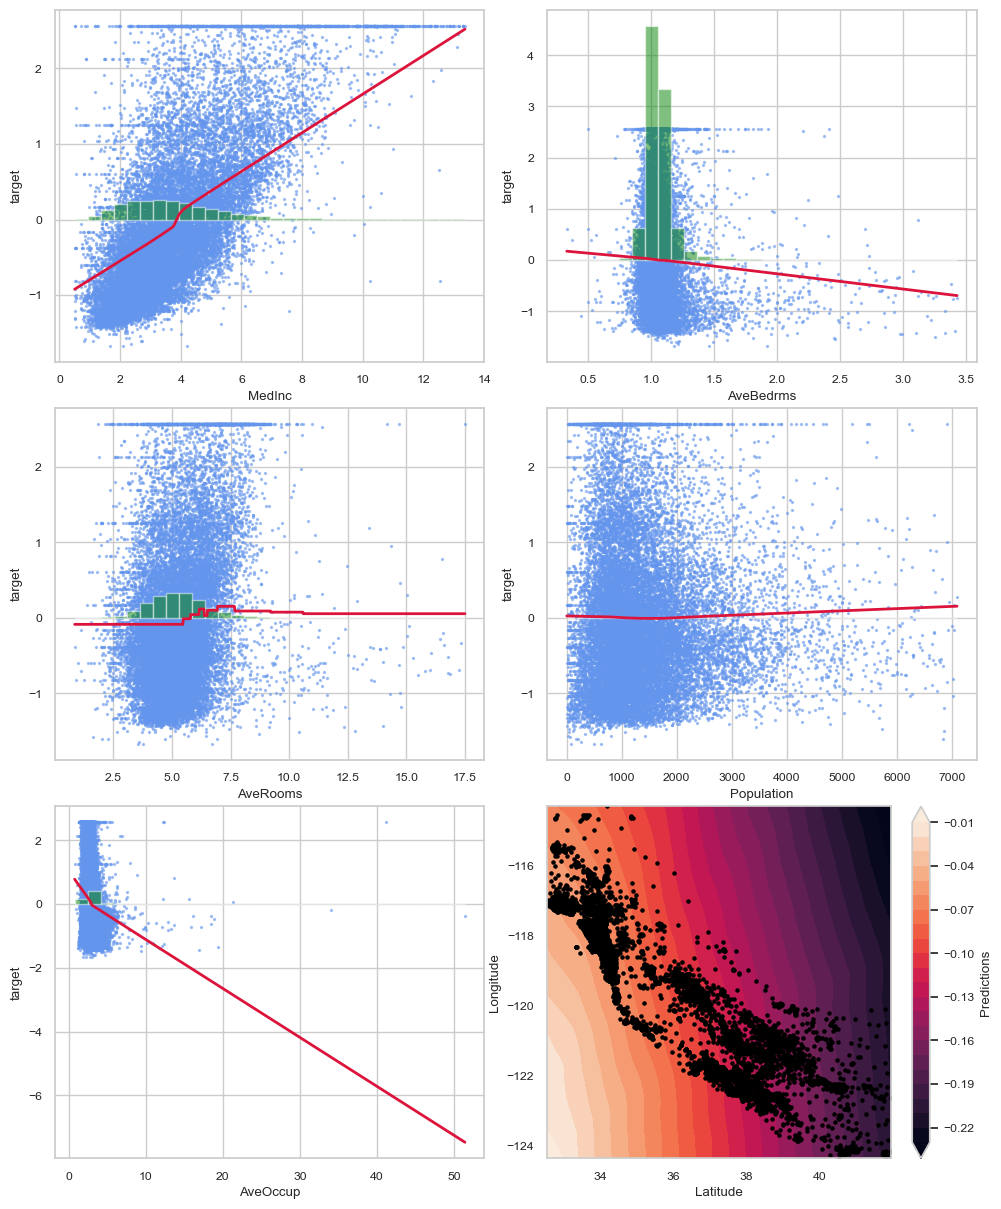

In [ ]:
nam.plot()

# Test Titanic

In [ ]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [ ]:
nam = NAM(
    "survived ~  -1 + MLP(fare) + MLP(n_siblings_spouses) + MLP(age) + MLP(parch) + MLP(sex) + MLP(deck) + MLP(embark_town) + MLP(alone)", 
    data=TITANIC, 
    feature_dropout=0.0001, 
    output_activation="linear")

--- Preprocessing ---


0it [00:00, ?it/s]

9it [00:00, 13.87it/s]
0it [00:00, ?it/s]


KeyError: 'MedInc'

In [ ]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics="accuracy")

# Train the model
nam.fit(nam.training_dataset, epochs=50, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 3.4389 - accuracy: 0.5438 - val_loss: 1.6254 - val_accuracy: 0.6400
Epoch 2/50
1/1 [==============================] - 0s 57ms/step - loss: 2.8380 - accuracy: 0.5817 - val_loss: 1.2436 - val_accuracy: 0.5920
Epoch 3/50
1/1 [==============================] - 0s 57ms/step - loss: 3.1134 - accuracy: 0.5896 - val_loss: 1.0231 - val_accuracy: 0.6240
Epoch 4/50
1/1 [==============================] - 0s 55ms/step - loss: 2.4913 - accuracy: 0.6016 - val_loss: 0.7808 - val_accuracy: 0.6880
Epoch 5/50
1/1 [==============================] - 0s 52ms/step - loss: 2.4458 - accuracy: 0.6255 - val_loss: 0.7125 - val_accuracy: 0.6960
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 2.8085 - accuracy: 0.6255 - val_loss: 0.8641 - val_accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 0s 66ms/step - loss: 2.9745 - accuracy: 0.5637 - val_loss: 0.6356 - val_accuracy: 0.7360
Epoch 8/50
1/1 [=============

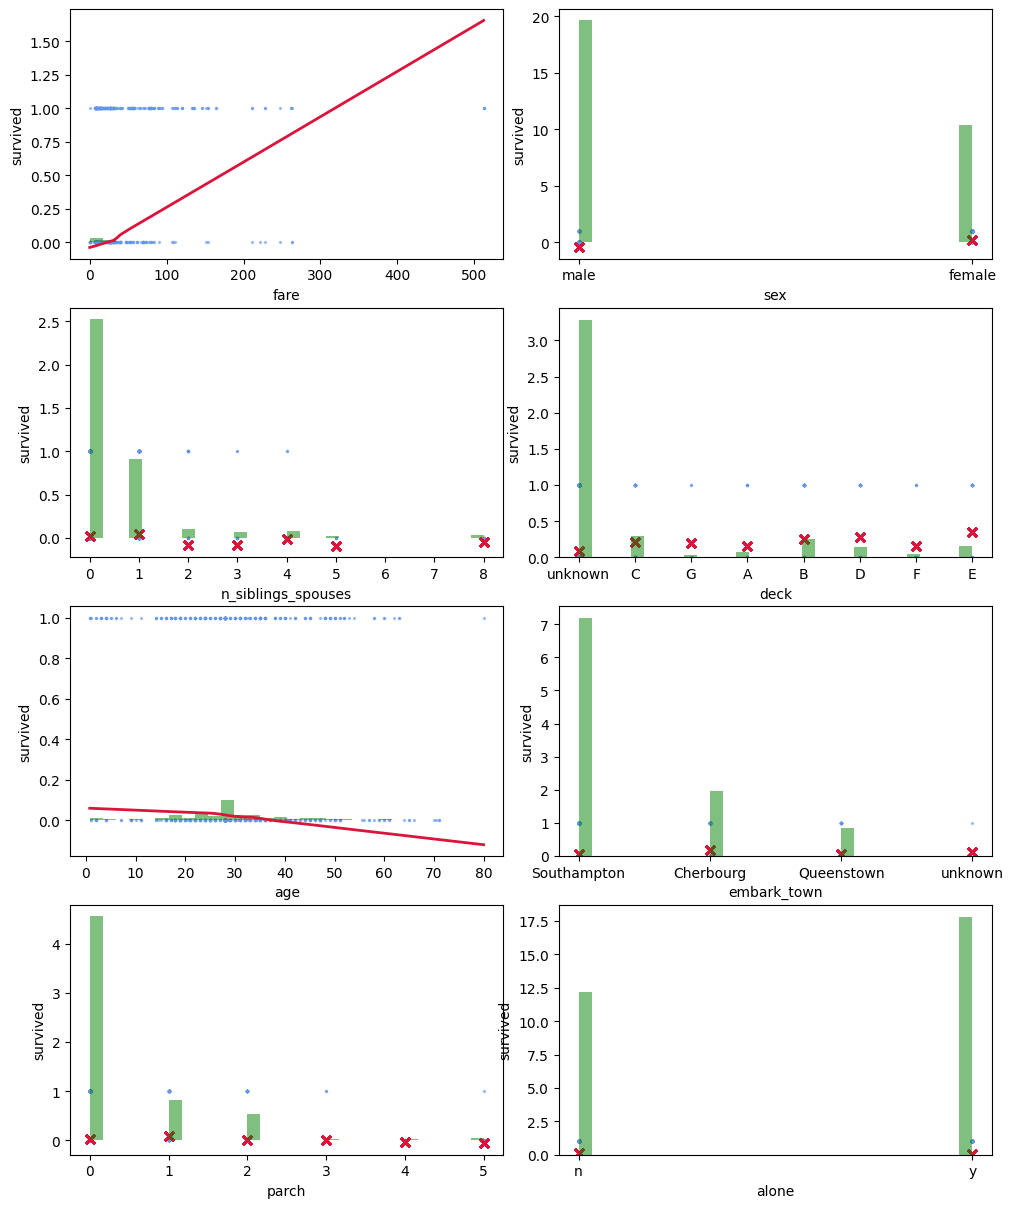

In [ ]:
nam.plot()

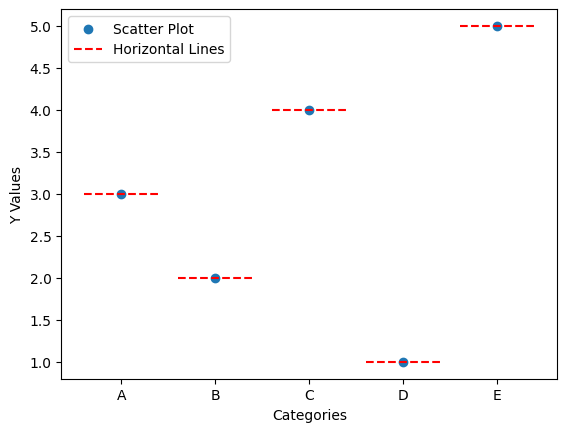

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample categorical data and corresponding y-values
categories = ['A', 'B', 'C', 'D', 'E']
y_values = [3, 2, 4, 1, 5]

# Create a scatterplot
plt.scatter(categories, y_values, label='Scatter Plot')

# Add horizontal lines at the y positions
y_positions = y_values  # Use the y_values directly
x_positions = np.arange(len(categories))  # Numerical x-positions
plt.hlines(y_positions, xmin=x_positions - 0.4, xmax=x_positions + 0.4, colors='r', linestyle='dashed', label='Horizontal Lines')

# Label the axes and add a legend
plt.xlabel('Categories')
plt.ylabel('Y Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
nam.feature_information

{'fare': {'Network': 'MLP',
  'dtype': dtype('float64'),
  'encoding': 'normalized'},
 'n_siblings_spouses': {'Network': 'MLP',
  'dtype': dtype('int64'),
  'encoding': 'one_hot'},
 'age': {'Network': 'MLP',
  'dtype': dtype('float64'),
  'encoding': 'normalized'},
 'parch': {'Network': 'MLP', 'dtype': dtype('int64'), 'encoding': 'one_hot'},
 'sex': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'},
 'deck': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'},
 'embark_town': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'},
 'alone': {'Network': 'MLP', 'dtype': dtype('O'), 'encoding': 'one_hot'}}

In [ ]:
# additive_model.py
class AdditiveModel:
    def __init__(self):
        self.custom_functions_registry = {}

    def register_custom_function(self, name):
        def decorator(func):
            self.custom_functions_registry[name] = func
            return func
        return decorator

    def use_custom_function(self, custom_function_name, *args, **kwargs):
        if custom_function_name in self.custom_functions_registry:
            custom_function = self.custom_functions_registry[custom_function_name]
            result = custom_function(*args, **kwargs)
            return result
        else:
            raise ValueError(f"Custom function '{custom_function_name}' is not registered.")

# Example usage:

# Create an instance of the AdditiveModel class
model = AdditiveModel()

# Define a custom function and register it with a name
@model.register_custom_function("multiply")
def custom_multiply(a, b):
    return a * b

@model.register_custom_function("add")
def custom_add(a, b):
    return a + b

# Use the custom functions in the model
result1 = model.use_custom_function("multiply", 5, 3)
print(f"Result of multiply: {result1}")

result2 = model.use_custom_function("add", 7, 4)
print(f"Result of add: {result2}")


Result of multiply: 15
Result of add: 11


In [ ]:
from keras.utils import to_categorical
to_categorical(TITANIC["n_siblings_spouses"])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)